# The Sparks Foundation 

# Data Science and Business Analytics - November 2021

# Task 2 :- Predictions Using Unsupervised ML

# Author : Kanishka Pawar

Problem Statement : From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
                   

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline

# Loading the Dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Learning the data

In [3]:
df.shape

(150, 4)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Finding the optimum number of clusters

# Using k-means clustering 

C:\Users\Kanishka Pawar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


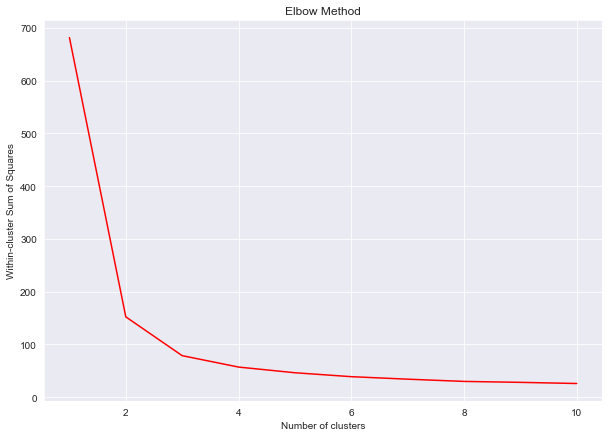

In [6]:
x=df.iloc[ :,[0,1,2,3]].values
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i, init="k-means++",n_init=10, max_iter=100, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)  #It will update the value of wcss up till 11
plt.figure(figsize=(10,7))
sb.set_style("darkgrid")    
plt.plot(range(1, 11), wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

# From above graph the Elbow is created at 3, therefore the optimum value of Within-cluster Sum of Squares (wcss) is 3

In [7]:
km=KMeans(n_clusters=3)
km_pred=km.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Making prediction

In [8]:
df['clusters'] = km_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [9]:
df['clusters'].value_counts()

2    62
1    50
0    38
Name: clusters, dtype: int64

# Visualising the data

<function matplotlib.pyplot.show(close=None, block=None)>

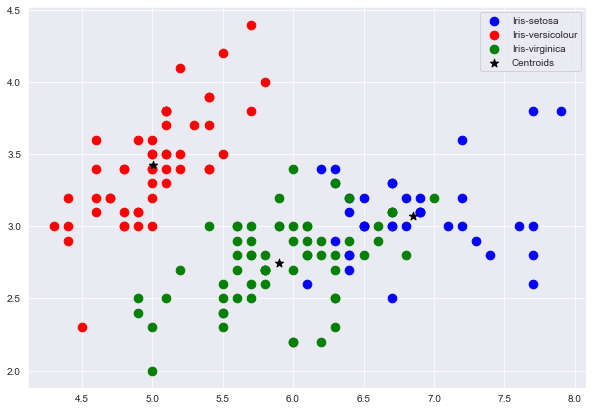

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], s=75, c="blue" , label="Iris-setosa")
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], s=75, c="red" , label="Iris-versicolour")
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1], s=75, c="green" , label="Iris-virginica")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=75, c="black", marker="*", label="Centroids")

plt.legend()
plt.show